In [1]:
# 導入所需的庫
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
from matplotlib import patches
import cv2

# 使用pandas的read_csv函數讀取csv文件
train = pd.read_csv('./BMPD.csv') 
train.head()

,image,height,weight,xmin,ymin,xmax,ymax,label,box_area,channel
0,001_F_L_33.JPG,3264,2448,1639.922330,681.320388,2990.679612,2087.533981,PALM_PRINT,992758.72184,3
1,001_F_L_33.JPG,3264,2448,1639.922330,681.320388,2990.679612,2087.533981,001,992758.72184,3
2,001_F_L_32.JPG,3264,2448,1830.058252,732.815534,3077.825243,2111.300971,PALM_PRINT,992758.72184,3
3,001_F_L_32.JPG,3264,2448,1830.058252,732.815534,3077.825243,2111.300971,001,992758.72184,3
4,001_F_L_30.JPG,3264,2448,1089.320388,43.572816,3168.932039,2131.106796,PALM_PRINT,992758.72184,3


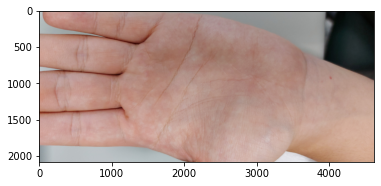

In [2]:
# 使用 matplotlib 的 imread 函數讀取單個圖像
image = plt.imread('./vott-csv-export/20211021_103106.jpg') 
plt.imshow(image)

In [2]:
train['image'].nunique()

1612

In [3]:
train['label'].value_counts()

PALM_PRINT    1611
007             40
039             40
033             40
014             40
002             40
036             40
028             40
018             40
037             40
038             40
020             40
011             40
041             40
005             40
012             40
004             40
030             40
029             40
025             40
035             40
008             40
006             40
017             40
003             40
034             40
024             40
009             40
016             40
022             40
013             40
001             40
010             40
031             40
023             40
040             40
027             40
032             40
015             40
026             40
019             40
021             12
Name: label, dtype: int64

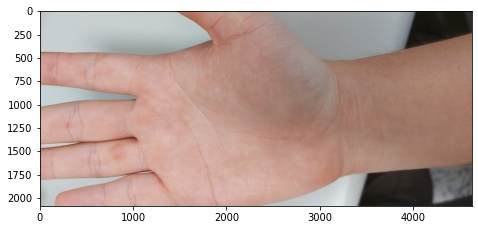

In [3]:
fig = plt.figure() 

#給圖像添加坐標軸
ax = fig.add_axes([0,0,1,1]) 

# 讀取並繪製圖像
image = plt.imread('./vott-csv-export/20211021_102635(1).jpg') 
plt .imshow(image) 

# iterating over the image for different objects
for _,row in train[train.image == "./vott-csv-export/20211021_102635(1).jpg"].iterrows():
    xmin = row.xmin 
    xmax = row.xmax 
    ymin = row.ymin 
    ymax = row.ymax 
    
    width = xmax - xmin 
    height = ymax - ymin 
    
    # 為不同類別的物體分配不同的顏色
    if row.label == 'PALM_PRINT': 
        edgecolor = 'g' 
        ax.annotate('PALM_PRINT', xy= (xmax-40,ymin+20)) 
    else:
        edgecolor = 'r'
        ax.annotate('number', xy=(xmax-40,ymin+20)) 

        
    # 給圖像添加邊界框
    rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none') 
    
    ax.add_patch(rect)

In [5]:
image.shape

(2084, 4624, 3)

In [5]:
data = pd.DataFrame()
data['format'] = train['image']

# as the images are in train_images folder, add train_images before the image name
for i in range(data.shape[0]):
    data['format'][i] = './Mydata/vott-csv-export/' + data['format'][i]
    print(data['format'][i])
    print(cv2.imread(data['format'][i]).shape)
    print(train['xmin'][i])


# add xmin, ymin, xmax, ymax and class as per the format required
for i in range(data.shape[0]):
    data['format'][i] = data['format'][i] + ',' + str((train['xmin'][i])) + ',' + str(train['ymin'][i]) + ',' + str((train['xmax'][i]+train['xmin'][i])) + ',' + str((train['ymax'][i]+train['ymin'][i])) + ',' + train['label'][i]
#     data['format'][i] = data['format'][i] + ',' + str((train['xmin'][i])) + ',' + str(train['ymin'][i]) + ',' + str(train['xmax'][i]) + ',' + str(train['ymax'][i]) + ',' + train['label'][i]

data.to_csv('BMPD.txt', header=None, index=None, sep=' ')

./Mydata/vott-csv-export/001_F_L_33.JPG


AttributeError: 'NoneType' object has no attribute 'shape'

In [9]:
 train['label'][2]

'PALM_PRINT'

In [21]:
data = pd.DataFrame()
data['format'] = train['image']
data1= pd.DataFrame()
data1['format'] = train['image']

# as the images are in train_images folder, add train_images before the image name
for i in range(data.shape[0]):
    data['format'][i] = './keras-frcnn/csv/' + data['format'][i]
    print(data['format'][i])
    print(cv2.imread(data['format'][i]).shape)
    print(train['xmin'][i])


# add xmin, ymin, xmax, ymax and class as per the format required


for i in range(data.shape[0]):
    if  train['label'][i] != 'PALM_PRINT' :
        data1['format'][i] =  './keras-frcnn/csv/' + data['format'][i] + ',' + train['label'][i]
#         data1['format'][i] = data['format'][i] + ',' + str((train['xmin'][i])) + ',' + str(train['ymin'][i]) + ',' + str(train['xmax'][i]) + ',' + str(train['ymax'][i]) + ',' + train['label'][i]

    else :
        data1['format'][i] = ''
#         data1['format'][i] = data['format'][i] + ',' + str((train['xmin'][i])) + ',' + str(train['ymin'][i]) + ',' + str(train['xmax'][i]) + ',' + str(train['ymax'][i]) + ',' + train['label'][i]
# data1.drop('ttt')
# data1.to_csv('BMPD.txt', header=None, index=None, sep=' ')

./keras-frcnn/csv/001_F_L_33.JPG
(3264, 2448, 3)
1639.9223300970873
./keras-frcnn/csv/001_F_L_33.JPG
(3264, 2448, 3)
1639.9223300970873
./keras-frcnn/csv/001_F_L_32.JPG
(3264, 2448, 3)
1830.0582524271845
./keras-frcnn/csv/001_F_L_32.JPG
(3264, 2448, 3)
1830.0582524271845
./keras-frcnn/csv/001_F_L_30.JPG
(3264, 2448, 3)
1089.3203883495146
./keras-frcnn/csv/001_F_L_30.JPG
(3264, 2448, 3)
1089.3203883495146
./keras-frcnn/csv/001_F_L_34.JPG
(3264, 2448, 3)
1639.9223300970873
./keras-frcnn/csv/001_F_L_34.JPG
(3264, 2448, 3)
1639.9223300970873
./keras-frcnn/csv/001_F_L_31.JPG
(3264, 2448, 3)
1049.7087378640776
./keras-frcnn/csv/001_F_L_31.JPG
(3264, 2448, 3)
1049.7087378640776
./keras-frcnn/csv/001_F_L_36.JPG
(3264, 2448, 3)
1679.533980582524
./keras-frcnn/csv/001_F_L_36.JPG
(3264, 2448, 3)
1679.533980582524
./keras-frcnn/csv/001_F_L_35.JPG
(3264, 2448, 3)
1639.9223300970873
./keras-frcnn/csv/001_F_L_35.JPG
(3264, 2448, 3)
1639.9223300970873
./keras-frcnn/csv/001_F_L_39.JPG
(3264, 2448, 3)
9

In [22]:
# data1.drop('ttt')
data1.to_csv('BMPD.txt', header=None, index=None, sep=' ')

In [ ]:
# !cd keras-frcnn && python train_frcnn.py -o simple -p annotate.txt


In [ ]:
import cv2
import numpy as np

img = cv2.imread('./testcsv/loss.png')
(a,b) = img.shape[: 2]

In [22]:
print(a,b)
import csv


288 432


In [23]:
data = pd.DataFrame()
data['format'] = train['image']
# as the images are in train_images folder, add train_images before the image name
for i in range(data.shape[0]):
    data['format'][i] = './testcsv/' + data['format'][i]
    (a,b,c) = cv2.imread(data['format'][i]).shape


In [25]:
import csv

with open('./vott-csv-export/BMPD-export.csv', 'w', newline='') as csvFile:
  # 定義欄位
    fieldNames = ['image', 'height', 'weight','xmin','ymin','xmax','ymax','label','box_area','channel']

  # 將 dictionary 寫入 CSV 檔
    writer = csv.DictWriter(csvFile, fieldNames)

  # 寫入第一列的欄位名稱
    writer.writeheader()
    data = pd.DataFrame()
    data['format'] = train['image']
    box_area = train['xmin'][i] * train['ymin'][i]
    # as the images are in train_images folder, add train_images before the image name
    for i in range(data.shape[0]):
        data['format'][i] = './testcsv/' + data['format'][i]
        (a,b,c) = cv2.imread(data['format'][i]).shape
      # 寫入資料
        writer.writerow({'image': train['image'][i] ,'height': a ,'weight': b ,'channel': c ,'xmin': train['xmin'][i] ,'ymin': train['ymin'][i] ,'xmax': train['xmax'][i] ,'ymax': train['ymax'][i] ,'label': train['label'][i],'box_area':box_area})
